# Introduction to Machine Learning (Part 1)


## Installs, Imports, and Constants

In [ ]:
%pip install numpy scipy pandas scikit-learn matplotlib seaborn[stats]

In [1]:
# Import packages

import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import numpy as np

In [46]:
RANDOM_SEED = 42

## Statistical Background


### Types of Data
- Numerical 
- Categorical

In [51]:
# numerical
a = [1, 2, 3, 4, 5] # discrete
b = [0.001, 0.002, 0.003, 0.004, 0.005] # continuous

# categorical
c = ['a', 'b', 'c', 'd', 'e'] # ordinal
d = ['cat', 'dog', 'bird', 'fish', 'lizard'] # nominal

### Types of Variables 

- **Independent Variables** also called input variables, explanatory variables, predictors, features, or attributes.
- **Dependent Variables** also called outcome variable, response variable, output variable, or class.

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 5, 3, 2, 1]

# create figure
plt.scatter(
    x,
    y,
    marker='x'
)

plt.xlabel('Feature')
plt.ylabel('Prediction')
plt.title('Scatter Plot of X vs Y');

### Sampling
**Sample Space**: The set of all possible outcomes of an random trial.

In [53]:
# create a random number generator
rng = np.random.default_rng(seed=RANDOM_SEED)

In [ ]:
# consider a coin flip
result_c = rng.choice(['heads', 'tails'], size=1) # what is the sample space?

# consider a die roll
result_d = rng.choice([1, 2, 3, 4, 5, 6], size=2) # what is the sample space?

print(result_c)
print(result_d)


### Probability Distributions (Distributions)

"A distribution is a function that gives the probabilities of occurrence of possible outcomes for an experiment."

**Examples**:
- Uniform Distribution
- Normal Distribution
- Binomial Distribution
- etc.



**Normal Distribution**

<img src="./extra/imgs/normal_dist.png" alt="normal distribution" width="600" height="300"/>


**Uniform Distribution**

<img src="./extra/imgs/uniform_dist.png" alt="uniform distribution" width="550" height="300"/>


In [ ]:
# consider a coin flip again

result_c = rng.choice(['heads', 'tails'], size=100) 

head_count = np.count_nonzero(result_c == 'heads')
tail_count = np.count_nonzero(result_c == 'tails')

plt.bar(x=['heads', 'tails'], height=[head_count, tail_count], width=0.5)

plt.show()
# what type of distribution are we sampling from?

### Distance 

- **L1 Distance** (i.e. Manhattan Distance)
- **L2 Distance** (i.e. Euclidean Distance)

<img src="./extra/imgs/l1_vs_l2_distance.svg.png" alt="normal distribution" width="350" height="350"/>

For any points $p, q \in R^2$:

$L1(p, q)=|p_1 - q_1| + |p_2 - q_2|$

In [ ]:
x1, x2 = 2, 10
y1, y2 = 3, -1

# L1 Distance

# 1 dim
dist1 = np.abs(x1-x2)

# 2 dim
dist2 = np.abs(x1 - x2) + np.abs(y1 - y2)

print(f'L1 Distance in one dimension: {dist1}')
print(f'L1 Distance in two dimensions: {dist2}')

For any points  $p, q \in R^2$

$L2(p, q)=\sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}$

In [ ]:
x1, x2 = 2, 10
y1, y2 = 3, -1

# L2 Distance

# 1 dim
dist1 = np.sqrt(np.pow(x1 - x2, 2))

# 2 dim
dist2 = np.sqrt(np.pow(x1 - x2, 2) + np.pow(y1 - y2, 2))

print(f'L2 Distance in one dimension: {dist1}')
print(f'L2 Distance in two dimensions: {dist2}')


### Scaling (Normalization)

- These terms are often interchangeable but they have distinct purposes in Sci-kit Learn

In [452]:
x = np.array(
    [[5, 0.2],
     [3, 0.4],
     [2, 0.1],
     [4, 0.6]]
)
x

array([[5. , 0.2],
       [3. , 0.4],
       [2. , 0.1],
       [4. , 0.6]])

In [ ]:
x.max(axis=0)

In [453]:
X_scaled = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
print(X_scaled)

[[1.         0.2       ]
 [0.33333333 0.6       ]
 [0.         0.        ]
 [0.66666667 1.        ]]


In [454]:
from sklearn.preprocessing import MinMaxScaler

In [455]:
# scale values inbetween 0 and 1

scaler = MinMaxScaler()
scaler.fit(x)
print(scaler.transform(x))

[[1.         0.2       ]
 [0.33333333 0.6       ]
 [0.         0.        ]
 [0.66666667 1.        ]]


In [456]:
from sklearn.preprocessing import StandardScaler

In [457]:
u = x.mean()
s = x.std()

print(f'Mean of x: {u}')
print(f'Std. Deviation of x: {s}')

Mean of x: 1.9124999999999999
Std. Deviation of x: 1.7786494173951202


In [458]:
# moves the data distribution. 
x_scaled = (x - u)/s

print(x_scaled.mean()) # approximately 0
print(x_scaled.std())

1.1102230246251565e-16
1.0


In [459]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [460]:
print(x_scaled.mean())
print(x_scaled.std())

-2.7755575615628914e-17
0.9999999999999999


## Linear/Logistic Regression


<img src="./extra/imgs/lin_and_log_reg.png" alt="normal distribution" width="600" height="300"/>

In [461]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Linear Regression

Slope and y-intercept: W=-2.2 b=11.8
Mean squared error: 0.08
R squared score: 0.99


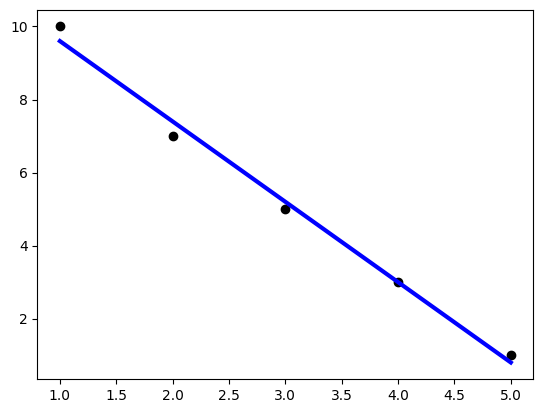

In [462]:
# TODO Introduce parameters (of models).

x = np.array([[1], [2], [3], [4], [5]])
y = np.array([[10], [7], [5], [3], [1]])

model = LinearRegression()
model.fit(x, y)

preds = model.predict(x)

plt.scatter(x, y, marker='o', color='black')
plt.plot(x, preds, color='blue', linewidth=3);

# The parameters of the model
print(f"Slope and y-intercept: W={model.coef_.item()} b={model.intercept_.item()}")
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, preds))
# Proportion of Y that is predictable with X: 1 is perfect prediction
print("R squared score: %.2f" % r2_score(y, preds))

plt.show()

In [463]:
# Linear Regression is not an iterative process (i.e. there is no learning occurring)

# Lets calculate the coeffecient and the intercept ourselves
n = len(x)
b = (sum(y)*sum(np.pow(x, 2)) - sum(x)*sum(x*y)) / (n*sum(np.pow(x,2)) - np.pow(sum(x), 2))
w = (n*sum(x*y) - sum(x)*sum(y)) / (n*sum(np.pow(x, 2)) - np.pow(sum(x), 2))

print(f'Intercept b = {b}')
print(f'Coeffecient W = {w}')

Intercept b = [11.8]
Coeffecient W = [-2.2]


In [464]:
from sklearn.datasets import load_diabetes

In [465]:
df = load_diabetes(as_frame=True).frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [466]:
# Create a Series with the targets
target = df["target"]
# Create a new dataframe without the "target" column
data = df.drop(columns=["target"])


In [467]:
model = LinearRegression()

model.fit(data, target)

preds = model.predict(data)

print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(target, preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(target, preds))

Coefficients: 
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
Mean squared error: 2859.70
Coefficient of determination: 0.52


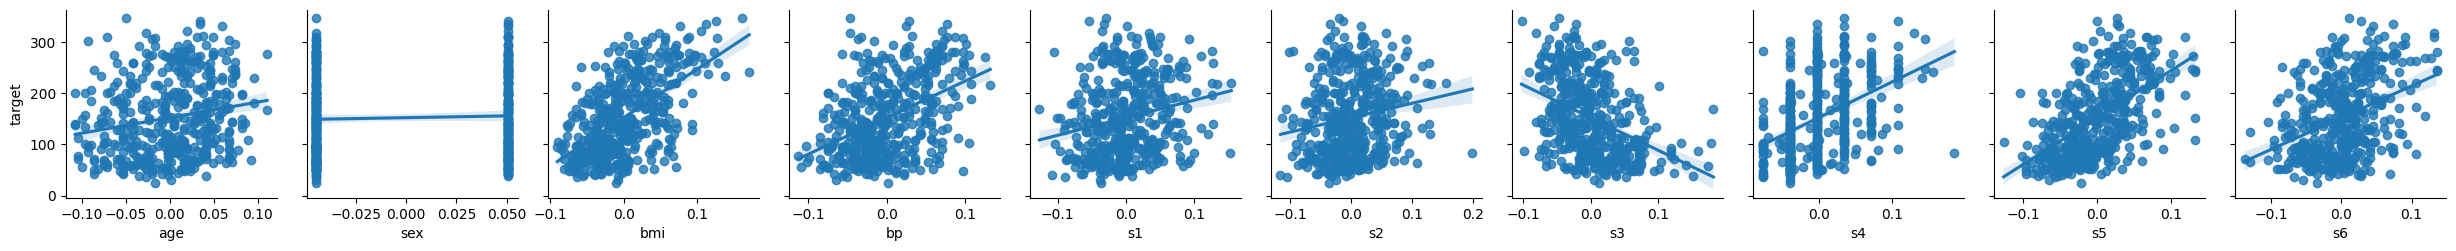

In [468]:
_ = sns.pairplot(df, kind="reg", y_vars="target", x_vars=data.columns, diag_kind="kde")

### Logisitc Regression

- Despite its name Logistic Regression is commonly used for classification in ML.
- The output of a Logisitc Regression model is between 0 and 1

In [469]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [470]:
df = load_breast_cancer(as_frame=True).frame # lets explore this dataset 

# Dataset Link: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html#load-iris

In [471]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [472]:
target = df["target"]

data = df.iloc[:, 2:3]

In [476]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [477]:
model = LogisticRegression(random_state=RANDOM_SEED)
model.fit(data, target) # C is a regularizer...

LogisticRegression(random_state=42)

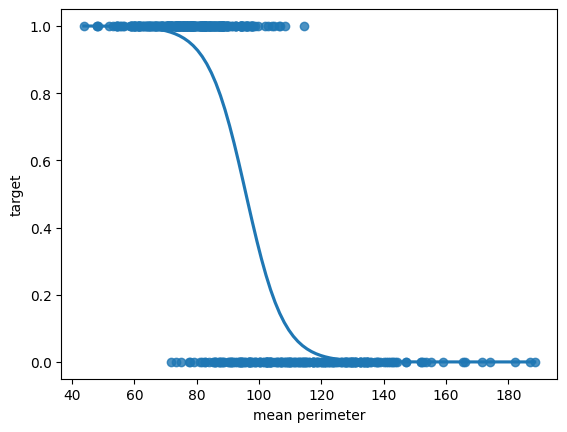

In [478]:
sns.regplot(x=data, y=target, data=df, logistic=True, ci=None); # How can we intrepret this model/graph?

In [ ]:
# notably, there is no closed-form solution for Logistic Regression (This is a fundamental difference from Linear Regression)

#### Mini Challenge

1. Create Logistic Regression models with 3 different features.
2. Graph the results of each.
3. Would any of these models be good predictors of whether or not a person has cancer?
 

## What is Machine Learning?

Application of artificial intelligence ( AI ) algorithms that are able to 
learn from data and imitate the way human beings make decisions without explicit instructions.

**Machine Learning Uses:**
* Prediction
* Image Recognition
* Speech recognition
* Medical Diagnoses

## Types of Machine Learning

**Supervised Learning:**
* System is trained on labeled Data
* EX: classification,regression

**Unsupervised Learning:**
* System is trained on unlabeled data
* EX: Clustering, Association

## Four Steps to Creating an ML ( Machine Learning ) Model

1. Select and Prepare a Dataset
2. Choose an algorithm to run on the dataset
3. Train the algorithm
4. Using & Improving the model

## First Model : Decision Tree

In [20]:
from sklearn.datasets import load_breast_cancer

In [53]:
# Load bread cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [ ]:
# Lets take a look at our features

print(X)

# Features, aka the columns of our data, represent data variables that help our model learn patterns

In [ ]:
# Lets look at our target

print(y)

# Since this is a binary classification problem, we are determining whether or not cancer is benign or malignant
# 0 = malignant ( cancerous ), 1 = benign

In [ ]:
# Lets look at our class distribiion

print(f"Class distribution: \n{pd.Series(y).value_counts()}")

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [85]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train a simple decision tree for visualization
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(X_train, y_train)

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)
plt.show()

In [ ]:
# try it with a bigger max_depth

dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit on the training Data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)
print(y_pred)

## **METRICS**

* When working with classification tasks, we often use metrics based on the proportion of true and false predicitions

Example: Breast Cancer Prediction

**True Positive:** Amount of correctly identified malignant tumors

**False Positive:** Amount of incorrectly identified malignant tumors

**True Negative:** Amount of correctly identified benign tumors

**False Negative:** Amount of incorrectly identified benign tumors

In [67]:
from sklearn.metrics import accuracy_score

In [ ]:
# Evaluate Prediction Quality
# sklearn accuracy_score() returns the accuracy score of the given predictions

accuracy_score(y_test, y_pred)

### **Accuracy Score:**

Proportion of all scores that are correct

ACC = ( TN + TP ) / ALL SCORES


In [ ]:
# You could also use...
# DecisionTreeClassifier.score() returns the accuracy score of the given predictions

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

print(train_score)
print(test_score)

In [ ]:
# Evaluating with Classification Report

clf_report = classification_report(y_test, y_pred)

print(clf_report)

### **Precision:**
- Measures the quality / accuracy of the predicitions, AKA, how often the model predicts correctly.

( When we predict cancer, how often are we correct ? )

TP / ( TP + FP )

### **Recall:**
- For all of the positive samples, this is the fraction that we correctly classified.

( Of all the cancer cases, how many did we catch ? )

TP / ( TP + FN )

### When to use which ?

Precision Priority
* Email spam filtering (better to let spam through than block real emails)

Recall Priority
* Cancer screening (better to have false alarms than miss cancer)
* Fraud detection (better to investigate false leads than miss fraud)

<br/>

**F1-Score**
* balanced measure of performance, computes the average of precision and recall

### Confusion Matrix

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Evaluating with Confusion Matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = ['malignant', 'benign'])

cm_display.plot()
plt.show()

### MINI CHALLENGE :)

**Hyperparameter Tuning**:
* This is a key step in using ML algorithms, where you find the best parameters to use when training a model

Manipulate the parameters of the original Decision tree to achive a better accuracy score.
There are many different parameters you can use to help increase Decision Tree accuracy...

- max_depth: limits how deep the tree can grow
- min_samples_split: minimum samples required to split at a node
- min_samples_leaf: each leaf must have this many samples
- random_state: controls the randomness of a tree

In [ ]:
dt_new = DecisionTreeClassifier( ______ )

dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print( accuracy_score(y_test, y_pred_new) )

## Second Model: RandomForest

**Random Forest**:
* an algorithm that combines the output of multiple trees to reach a result.

For classification tasks, the output is the class selected by the most trees

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Initialize and fit your Random Forest Classifier on the same data

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
# Evaluate, did the RF model perform better than the DT?

accuracy_score(y_test, rf_pred)

## Underfitting vs Overfitting

When evaluating the quality of a ML model, it is important to determine the quality of the fit.

**Overfitting**:
* The model is too complex and fits the training data too closely, thus is unable to make quality predicitons on new data
* High Training Accuracy with low testing accuracy


**Underfitting**
* The model is too simple, and cannot find the underlying patterns of the data
* Poor training and testing accuracies

In a good balanced model, the algorithm will capture important patterns without memorizing the training data.

<img src="extra\imgs\under_over_fitting.png" alt="Overfitting vs Underfitting">


In [ ]:
underfit_rf = RandomForestClassifier(
    n_estimators=1,  # Very few trees
    max_depth=1,     # Very shallow trees
    random_state=42
)

underfit_rf.fit(X_train, y_train)
rf_pred_train = underfit_rf.predict(X_train)
rf_pred_test = underfit_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

In [ ]:
good_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=4,
    random_state=42
)

good_rf.fit(X_train, y_train)
rf_pred_train = good_rf.predict(X_train)
rf_pred_test = good_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

In [ ]:
overfit_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,  # Unlimited depth
    min_samples_leaf=1,  # Allow single-sample leaves
    random_state=42
)

overfit_rf.fit(X_train, y_train)
rf_pred_train = overfit_rf.predict(X_train)
rf_pred_test = overfit_rf.predict(X_test)

train_score =  accuracy_score(y_train, rf_pred_train)
test_score =  accuracy_score(y_test, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

## Feature Importance

Feature selection is an important step for improving your Machine learning model.
By removing unneccesary features ( columns ), sometimes you can improve the performance and runtime of your model.

In [95]:
# Some classifiers such as Random Forest, have built in tools to help you determine feature importance
# lets determine the best features using our good_rf model

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': good_rf.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
print("\nTop 5 Most Important Features (Random Forest):")
print(rf_importance.head())

## Mini Challenge :)

Using Feature importance, determine top 3 least important features.

Then, see what removing them from the data does for your model.

In [ ]:
print("\n Least Important Features (Random Forest):")
print(rf_importance.tail())

In [100]:
# Drop your feature(s)

X_new = X.drop(['mean symmetry', 'texture error', 'symmetry error', 'smoothness error'], axis=1, inplace=False)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [ ]:
# Evaluate your new model using good_rf, did the performance improve?

good_rf.fit(X_train_new, y_train_new)
rf_pred_train = good_rf.predict(X_train_new)
rf_pred_test = good_rf.predict(X_test_new)

train_score =  accuracy_score(y_train_new, rf_pred_train)
test_score =  accuracy_score(y_test_new, rf_pred_test)

print(f"Train Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")
print(f"Gap: {train_score - test_score:.3f}")

# !!!Problem: only mean symmetry really imporves the training accuracy and only by a lil bit, might want to use diff data?

## SVM

#### Saving Results

## Cross Validation

- It helps remove reliance/dependence on the particular train/test split made.

<img src="extra/imgs/cross_validation.jpg" height="400px" width="600px">

In [479]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import load_iris 

In [480]:
X, y = load_iris(return_X_y=True)

In [481]:
X.shape, y.shape

((150, 4), (150,))

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RANDOM_SEED)

In [492]:
model = svm.SVC(kernel='linear', C=1, random_state=RANDOM_SEED)

In [493]:
model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [494]:
model.score(X_test, y_test)

1.0

In [495]:
# Lets perform cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

[1.         0.88888889 0.94444444 1.         0.94444444]


In [ ]:
print("%0.2f is the average accuracy, with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

- **Lets try fitting the model again, but with another split.**

In [78]:
# we can alos create custom cv strategies
from sklearn.model_selection import ShuffleSplit

In [84]:
ss = ShuffleSplit(n_splits=5, test_size=0.4)

In [ ]:
scores_ss = cross_val_score(model, X_train, y_train, cv=ss)
print(scores_ss)

In [ ]:
print("%0.2f is the average accuracy, with a standard deviation of %0.2f" % (scores_ss.mean(), scores_ss.std()))

- **Whats the difference?**

<img src="extra/imgs/shuffle_split.png" height="350px" width="600px">


### Mini Challenge

1. Using the same dataset, perform cross validation with the StratifiedFold class.
2. Be able to explain the difference between KFOLD and StratifiedFold

In [ ]:
X, y = load_iris(return_X_y=True)

## Cross Validation (Continued)

- CV can be useful for hyperparameter tuning

In [163]:
from sklearn.datasets import fetch_openml

ds = fetch_openml(data_id=37)

# Dataset Link: https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=gte_2&id=1504

In [165]:
df = ds.frame
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [167]:
data = ds.data
target = ds.target

In [202]:
target = target.apply(lambda label: 1 if label == 'tested_positive' else 0)

In [208]:
target.value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [229]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=RANDOM_SEED)

In [230]:
model = RandomForestClassifier(random_state=RANDOM_SEED, class_weight='balanced')

In [231]:
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [232]:
train_acc = model.score(x_train, y_train)
train_acc

1.0

In [233]:
test_acc = model.score(x_test, y_test)
test_acc

0.7445887445887446

- **How can cross validation help us? Lets discuss a models Parameter Space?**

- **Lets explore the [RandomForestClassifer's](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#randomforestclassifier) Parameter Space.**


In [404]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import balanced_accuracy_score

In [441]:
param_grid = {
    'n_estimators': [50, 100],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2, 3],
}

In [447]:
model = RandomForestClassifier(random_state=RANDOM_SEED)

kfold = KFold(n_splits=4, shuffle=True, random_state=RANDOM_SEED)

grid_searcher = GridSearchCV(model, param_grid=param_grid, cv=kfold, scoring='balanced_accuracy')

In [448]:
grid_searcher.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [50, 100]},
             scoring='balanced_accuracy')

In [449]:
import json

results = grid_searcher.cv_results_

with open('gs_results.json', 'w') as f:
    json.dump(results, f, default=lambda obj: obj.tolist() if isinstance(obj, np.ndarray) else obj)

In [450]:
# Sort the results by mean_test_score in descending order
# Get the index of all the 1s in results['params']
top_ranks = [(rank, i) for i, rank in enumerate(results['rank_test_score']) if rank in range(1, 3)]

top_rank_idxs = [idx for rank, idx in sorted(top_ranks, key=lambda x: x[0], reverse=True)]

top_params = [results['params'][idx] for idx in top_rank_idxs]

top_params

[{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100},
 {'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100},
 {'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}]

In [451]:
for ps in top_params[:1]:

    model = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_SEED, **ps)

    model.fit(x_train, y_train)

    score = model.score(x_test, y_test)
    print(score)


0.7489177489177489
